<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2018年歩行量調査データ" data-toc-modified-id="2018年歩行量調査データ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2018年歩行量調査データ</a></span><ul class="toc-item"><li><span><a href="#テストしながら個別処理を行ってみる" data-toc-modified-id="テストしながら個別処理を行ってみる-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>テストしながら個別処理を行ってみる</a></span></li><li><span><a href="#城東通りの歩行量調査集計表示" data-toc-modified-id="城東通りの歩行量調査集計表示-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>城東通りの歩行量調査集計表示</a></span></li></ul></li><li><span><a href="#2019年度歩行量調査データ" data-toc-modified-id="2019年度歩行量調査データ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2019年度歩行量調査データ</a></span></li><li><span><a href="#JARTICデータからみた城東通りの交通量" data-toc-modified-id="JARTICデータからみた城東通りの交通量-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>JARTICデータからみた城東通りの交通量</a></span></li><li><span><a href="#目視での交通量調査-(12/01,-12/02,-12/03)" data-toc-modified-id="目視での交通量調査-(12/01,-12/02,-12/03)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>目視での交通量調査 (12/01, 12/02, 12/03)</a></span></li><li><span><a href="#Google-traffic-info" data-toc-modified-id="Google-traffic-info-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Google traffic info</a></span><ul class="toc-item"><li><span><a href="#所要時間の時間変化-(日にちについての平均)" data-toc-modified-id="所要時間の時間変化-(日にちについての平均)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>所要時間の時間変化 (日にちについての平均)</a></span></li><li><span><a href="#曜日ごとの所要時間の時間変化" data-toc-modified-id="曜日ごとの所要時間の時間変化-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>曜日ごとの所要時間の時間変化</a></span></li></ul></li><li><span><a href="#データの統合" data-toc-modified-id="データの統合-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>データの統合</a></span><ul class="toc-item"><li><span><a href="#該当Wi-Fiデータ(20191129---20191201)をデータベースから抽出、ファイルへ" data-toc-modified-id="該当Wi-Fiデータ(20191129---20191201)をデータベースから抽出、ファイルへ-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>該当Wi-Fiデータ(20191129 - 20191201)をデータベースから抽出、ファイルへ</a></span></li><li><span><a href="#各種データをファイルから読み込み統合" data-toc-modified-id="各種データをファイルから読み込み統合-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>各種データをファイルから読み込み統合</a></span></li></ul></li></ul></div>

# 城東通りの交通量分析


## 2018年歩行量調査データ


双方向全体を見るために、風月堂と武藤呉服店の合計を見てみる。

以前のデータは、センサに対応する地点の情報だけだったので、武藤呉服店のデータが含まれていなかった（元の測定データに会ったので追加。）

地点IDは"3a"である。"3"が風月堂。

pandasのDataFrameに対して使う技術

- 特定のidをもつ行を取り出す
- ある列の値が共通の行について和を取る (groupbyとsum）
- 上記はマルチインデックスになるので、それを平たくする (reset_index)
- 二つのデータフレームを、共通のインデックスを指定してマージする
- 必要ない列を消去する （drop(??, axis=1)）
- 列の名前を変える （rename(columns={??: ??, ...}）


### テストしながら個別処理を行ってみる

2018年のデータ

In [10]:
data = pd.read_csv("/home/toyoki/work/kofu/pedesData/18/kofuPedesSurvey20181130a.csv",
                   comment="#", names=["id", "date", "hour", "kind", "direction", "number"])
temp = data[data["id"]=="3"].groupby(['hour','direction']).sum()
temp.reset_index().drop('date', axis=1)
# 武藤
temp_a = data[data["id"]=="3a"].groupby(['hour','direction']).sum()
temp_a.reset_index().drop('date', axis=1)

# 結合 x: 風月堂, y: 武藤
two_point_data = pd.merge(temp, temp_a, on=["hour", "direction"]).reset_index()

# 2地点の和
two_point_data['total'] = two_point_data['number_x'] + two_point_data['number_y']
two_point_data

hour direction    date_x  number_x    date_y  number_y  total
0     10         E  40362260      17.0  60543390      35.0   52.0
1     10         W  60543390      50.0  60543390      85.0  135.0
2     11         E  40362260      22.0  60543390      96.0  118.0
3     11         W  60543390      48.0  60543390      83.0  131.0
4     12         E  40362260      41.0  60543390      98.0  139.0
5     12         W  60543390      49.0  60543390      79.0  128.0
6     13         E  40362260      23.0  60543390      83.0  106.0
7     13         W  60543390      50.0  60543390      61.0  111.0
8     14         E  40362260      37.0  60543390      61.0   98.0
9     14         W  60543390      56.0  60543390      68.0  124.0
10    15         E  40362260      34.0  60543390      86.0  120.0
11    15         W  60543390      58.0  60543390      51.0  109.0
12    16         E  40362260      56.0  60543390     103.0  159.0
13    16         W  60543390      54.0  60543390      60.0  114.0
14    17         E  40362260      46.0  60543390     126.0  172.0
15    17         W  60543390      97.0  60543390      94.0  191.0
16    18         E  40362260      76.0  60543390     162.0  238.0
17    18         W  60543390     126.0  60543390      87.0  213.0
18    19         E  40362260      68.0  60543390     169.0  237.0
19    19         W  60543390     112.0  60543390      37.0  149.0

In [11]:

import pandas as pd

# 1130
data = pd.read_csv("/home/toyoki/work/kofu/pedesData/18/kofuPedesSurvey20181130a.csv",
                   comment="#", names=["id", "date", "hour", "kind", "direction", "number"])
# 風月堂
temp = data[data["id"]=="3"].groupby(['hour','direction']).sum()
temp.reset_index().drop('date', axis=1)
# 武藤
temp_a = data[data["id"]=="3a"].groupby(['hour','direction']).sum()
temp_a.reset_index().drop('date', axis=1)

# 結合 x: 風月堂, y: 武藤
two_point_data = pd.merge(temp, temp_a, on=["hour", "direction"]).reset_index()

# 2地点の和
two_point_data['total'] = two_point_data['number_x'] + two_point_data['number_y']

# 余分な列を落とす
two_point_data = two_point_data.drop(['date_x', 'date_y'], axis=1)


In [12]:
# 2地点の東向き(total_east), 西向き(total_west)の列を作り、一つのファイルに
temp = two_point_data[two_point_data['direction'] == "E"].rename(
    columns={
        'number_x': 'fugetsu_east',
        'number_y': 'muto_east',
        'total': 'total_east'
    })
temp1 = two_point_data[two_point_data['direction'] == "W"].rename(
    columns={
        'number_x': 'fugetsu_west',
        'number_y': 'muto_west',
        'total': 'total_west'
    })
two_points = pd.merge(temp,temp1, on="hour").drop(['direction_x', 'direction_y'], axis=1)
two_points

hour  fugetsu_east  muto_east  total_east  fugetsu_west  muto_west  \
0    10          17.0       35.0        52.0          50.0       85.0   
1    11          22.0       96.0       118.0          48.0       83.0   
2    12          41.0       98.0       139.0          49.0       79.0   
3    13          23.0       83.0       106.0          50.0       61.0   
4    14          37.0       61.0        98.0          56.0       68.0   
5    15          34.0       86.0       120.0          58.0       51.0   
6    16          56.0      103.0       159.0          54.0       60.0   
7    17          46.0      126.0       172.0          97.0       94.0   
8    18          76.0      162.0       238.0         126.0       87.0   
9    19          68.0      169.0       237.0         112.0       37.0   

   total_west  
0       135.0  
1       131.0  
2       128.0  
3       111.0  
4       124.0  
5       109.0  
6       114.0  
7       191.0  
8       213.0  
9       149.0

### 城東通りの歩行量調査集計表示

上記の作業をまとめて関数にし、3日間のデータを図示


In [13]:
import pandas as pd


def mergeTwoPoints(filename, id1, id2, name1='point1', name2='point2'):
    data = pd.read_csv(
        filename,
        comment="#",
        names=["id", "date", "hour", "kind", "direction", "number"])
    # 風月堂
    temp = data[data["id"] == id1].groupby(['hour', 'direction']).sum()
    temp.reset_index().drop('date', axis=1)
    # 武藤
    temp_a = data[data["id"] == id2].groupby(['hour', 'direction']).sum()
    temp_a.reset_index().drop('date', axis=1)

    # 結合
    two_point_data = pd.merge(
        temp, temp_a, on=["hour", "direction"]).reset_index()

    # 2地点の和
    two_point_data[
        'total'] = two_point_data['number_x'] + two_point_data['number_y']

    # 余分な列を落とす
    two_point_data = two_point_data.drop(['date_x', 'date_y'], axis=1)

    # 2地点の東向き(total_east), 西向き(total_west)の列を作り、一つのファイルに
    temp = two_point_data[two_point_data['direction'] == "E"].rename(
        columns={
            'number_x': name1 + '_east',
            'number_y': name2 + '_east',
            'total': 'total_east'
        })
    temp1 = two_point_data[two_point_data['direction'] == "W"].rename(
        columns={
            'number_x': name1 + '_west',
            'number_y': name2 + '_west',
            'total': 'total_west'
        })
    return pd.merge(
        temp, temp1, on="hour").drop(['direction_x', 'direction_y'], axis=1)

CompletedProcess(args='inkscape --file JotoPedesData2018.svg --export-emf JotoPedesData2018.emf', returncode=0)

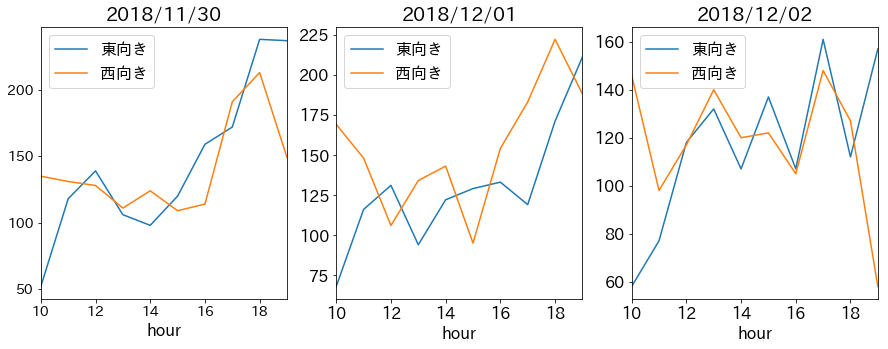

In [14]:
# 3日間のデータを読み込んで処理

import matplotlib.pyplot as plt
from datetime import datetime as dt

filename_body = "/home/toyoki/work/kofu/pedesData/18/kofuPedesSurvey"
dt20181130 = mergeTwoPoints(filename_body + "20181130a.csv", "3", "3a",
                            "fugetsu", "muto")
dt20181201 = mergeTwoPoints(filename_body + "20181201a.csv", "3", "3a",
                            "fugetsu", "muto")
dt20181202 = mergeTwoPoints(filename_body + "20181202a.csv", "3", "3a",
                            "fugetsu", "muto")

plt.rcParams["font.size"] = 16
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
dt20181130.plot(
    x='hour',
    y=['total_east', 'total_west'],
    ax=axes[0],
    label=["東向き", "西向き"],
    title="2018/11/30",
    fontsize=14)
dt20181201.plot(
    x='hour',
    y=['total_east', 'total_west'],
    ax=axes[1],
    label=["東向き", "西向き"],
    title="2018/12/01")
dt20181202.plot(
    x='hour',
    y=['total_east', 'total_west'],
    ax=axes[2],
    label=["東向き", "西向き"],
    title="2018/12/02")

file_body = "JotoPedesData2018"
plt.savefig(file_body + ".svg", bbox_inches="tight")
import subprocess
subprocess.run("inkscape --file " + file_body + ".svg" + " --export-emf " + file_body + ".emf", shell=True)


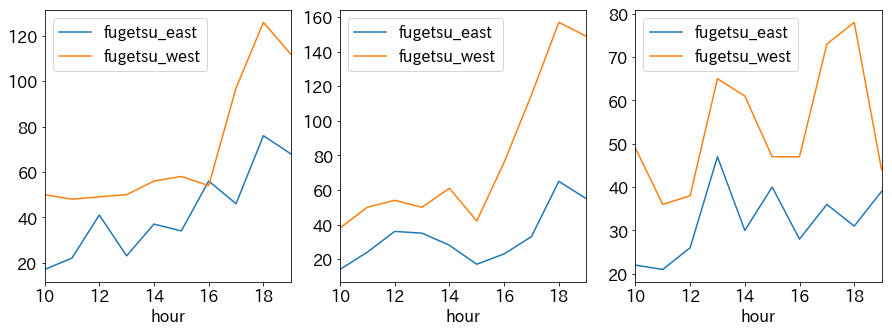

In [15]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
dt20181130.plot(x='hour', y=['fugetsu_east', 'fugetsu_west'], ax=axes[0])
dt20181201.plot(x='hour', y=['fugetsu_east', 'fugetsu_west'], ax=axes[1])
dt20181202.plot(x='hour', y=['fugetsu_east', 'fugetsu_west'], ax=axes[2])

## 2019年度歩行量調査データ

城東通の２か所のデータを抜き出したものを利用（並木君が作成したセンサ設置全地点のデータとは形式が異なる）

In [16]:
import pandas as pd
import numpy as np
#
data = pd.read_csv("/home/toyoki/work/kofu/pedesData/jotoPedesSurvey2019.csv",
                   comment="#", names=["id", "date", "hour", "kind", "direction", "number"])
data

id      date  hour kind direction  number
0     3  20191129    10    p         E    16.0
1     3  20191129    11    p         E    27.0
2     3  20191129    12    p         E    52.0
3     3  20191129    13    p         E    28.0
4     3  20191129    14    p         E    18.0
5     3  20191129    15    p         E    31.0
6     3  20191129    16    p         E    51.0
7     3  20191129    17    p         E    73.0
8     3  20191129    18    p         E    68.0
9     3  20191129    19    p         E    72.0
10    3  20191129    10    b         E     2.0
11    3  20191129    11    b         E     2.0
12    3  20191129    12    b         E     6.0
13    3  20191129    13    b         E     6.0
14    3  20191129    14    b         E     4.0
15    3  20191129    15    b         E     7.0
16    3  20191129    16    b         E     4.0
17    3  20191129    17    b         E     8.0
18    3  20191129    18    b         E     8.0
19    3  20191129    19    b         E     3.0
20    3  20191129    10    p         W    21.0
21    3  20191129    11    p         W    32.0
22    3  20191129    12    p         W    29.0
23    3  20191129    13    p         W    27.0
24    3  20191129    14    p         W    31.0
25    3  20191129    15    p         W    17.0
26    3  20191129    16    p         W    28.0
27    3  20191129    17    p         W    37.0
28    3  20191129    18    p         W   114.0
29    3  20191129    19    p         W   103.0
..   ..       ...   ...  ...       ...     ...
300  3a  20191201    10    p         E    28.0
301  3a  20191201    11    p         E    53.0
302  3a  20191201    12    p         E    73.0
303  3a  20191201    13    p         E    57.0
304  3a  20191201    14    p         E    61.0
305  3a  20191201    15    p         E    79.0
306  3a  20191201    16    p         E    67.0
307  3a  20191201    17    p         E    74.0
308  3a  20191201    18    p         E    70.0
309  3a  20191201    19    p         E   100.0
310  3a  20191201    10    b         E    11.0
311  3a  20191201    11    b         E     6.0
312  3a  20191201    12    b         E    12.0
313  3a  20191201    13    b         E     8.0
314  3a  20191201    14    b         E     2.0
315  3a  20191201    15    b         E     7.0
316  3a  20191201    16    b         E    19.0
317  3a  20191201    17    b         E    14.0
318  3a  20191201    18    b         E    12.0
319  3a  20191201    19    b         E     7.0
320  3a  20191201    10    m         E     8.0
321  3a  20191201    11    m         E     3.0
322  3a  20191201    12    m         E     5.0
323  3a  20191201    13    m         E     6.0
324  3a  20191201    14    m         E     5.0
325  3a  20191201    15    m         E     3.0
326  3a  20191201    16    m         E     4.0
327  3a  20191201    17    m         E     4.0
328  3a  20191201    18    m         E     1.0
329  3a  20191201    19    m         E     4.0

[330 rows x 6 columns]

In [17]:
# 日付列の型を文字に
data['date'].astype(np.int64).astype(str)
data.head()

id      date  hour kind direction  number
0  3  20191129    10    p         E    16.0
1  3  20191129    11    p         E    27.0
2  3  20191129    12    p         E    52.0
3  3  20191129    13    p         E    28.0
4  3  20191129    14    p         E    18.0

In [18]:
# kind(歩行、自転車、原付)の和を取る
# 風月堂
temp = data[data["id"]=="3"].groupby(['date','hour','direction']).sum()
# 武藤
temp_a = data[data["id"]=="3a"].groupby(['date','hour','direction']).sum()
#temp_a.reset_index().drop('date', axis=1)
temp.head()

number
date     hour direction        
20191129 10   E            18.0
              W            43.0
         11   E            29.0
              W            57.0
         12   E            58.0

In [19]:
# マルチインデックスを平らに
temp = temp.reset_index()
temp_a = temp_a.reset_index()
temp.head()

date  hour direction  number
0  20191129    10         E    18.0
1  20191129    10         W    43.0
2  20191129    11         E    29.0
3  20191129    11         W    57.0
4  20191129    12         E    58.0

In [24]:
# 風月堂、武藤を一つのデータフレームに
df2019 = pd.merge(temp, temp_a, on=['date', 'hour','direction'])
df2019.head()

date  hour direction  number_x  number_y
0  20191129    10         E      18.0      54.0
1  20191129    10         W      43.0      73.0
2  20191129    11         E      29.0      74.0
3  20191129    11         W      57.0      73.0
4  20191129    12         E      58.0     122.0

In [28]:
# 列名変更と風月堂と武藤呉服店の合計(total)の列を作成
df2019["total"] = df2019['number_x'] + df2019['number_y']
df2019.rename(columns = {'number_x': 'fugetsu', 'number_y': 'muto'}, inplace=True)
df2019.head(10)
# データの書き出し
df2019.to_csv("pedestrianData2019.csv", index=False)

Text(0.5, 1.0, '2019/12/01')

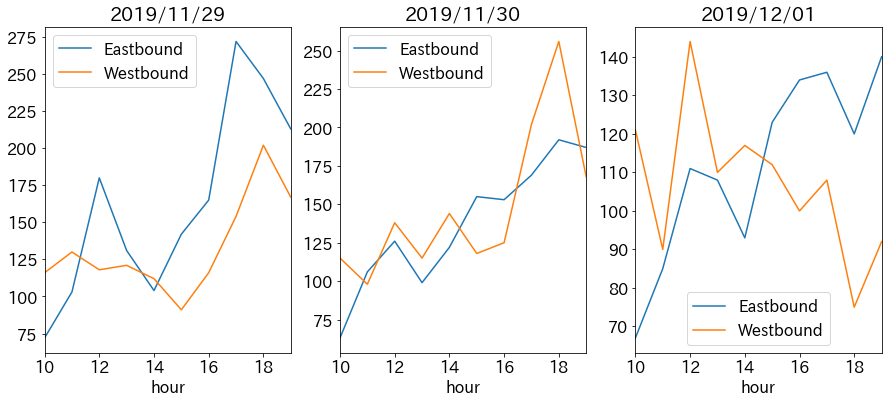

In [29]:
# 図表示 
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
a = df2019.groupby(['date','direction'])
a.get_group((20191129,'E')).plot(x='hour', y='total', label='Eastbound', ax=axes[0])
a.get_group((20191129,'W')).plot(x='hour', y='total', label='Westbound', ax=axes[0])
a.get_group((20191130,'E')).plot(x='hour', y='total', label='Eastbound', ax=axes[1])
a.get_group((20191130,'W')).plot(x='hour', y='total', label='Westbound', ax=axes[1])
a.get_group((20191201,'E')).plot(x='hour', y='total', label='Eastbound', ax=axes[2])
a.get_group((20191201,'W')).plot(x='hour', y='total', label='Westbound', ax=axes[2])

axes[0].set_title("2019/11/29")
axes[1].set_title("2019/11/30")
axes[2].set_title("2019/12/01")

CompletedProcess(args='inkscape --file 歩行量ー風月堂ー武藤2019.svg --export-emf 歩行量ー風月堂ー武藤2019.emf', returncode=0)

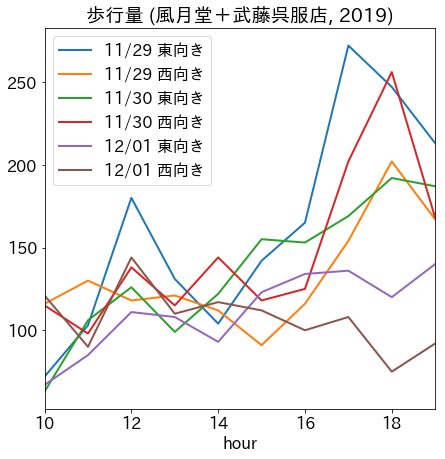

In [80]:
fig,axes = plt.subplots(ncols=1, nrows=1, figsize=(7,7))
a = df2019.groupby(['date','direction'])
a.get_group((20191129,'E')).plot(x='hour', y='total', label='11/29 東向き', ax=axes, lw=2)
a.get_group((20191129,'W')).plot(x='hour', y='total', label='11/29 西向き', ax=axes, lw=2)
a.get_group((20191130,'E')).plot(x='hour', y='total', label='11/30 東向き', ax=axes, lw=2)
a.get_group((20191130,'W')).plot(x='hour', y='total', label='11/30 西向き', ax=axes, lw=2)
a.get_group((20191201,'E')).plot(x='hour', y='total', label='12/01 東向き', ax=axes, lw=2)
a.get_group((20191201,'W')).plot(x='hour', y='total', label='12/01 西向き', ax=axes, lw=2)
axes.set_title("歩行量 (風月堂＋武藤呉服店, 2019)")
file_body = "歩行量ー風月堂ー武藤2019"
plt.savefig(file_body + ".svg", bbox_inches="tight")
import subprocess
subprocess.run("inkscape --file " + file_body + ".svg" + " --export-emf " + file_body + ".emf", shell=True)

## JARTICデータからみた城東通りの交通量

JARTICのデータは１か月遅れで公開されるので、1月時点では9,10,11月のデータしかない。


In [438]:
"""
あらかじめsakura_dori.csvとkasuga.csvを作っておく
8tops上では
   grep "地点名" yamanashiTraffic201909.csv > xxxx.csv
でOK

grep "春日モール" yamanashiTraffic201909.csv > kasuga.csv
grep "桜通り中" yamanashiTraffic201909.csv > sakura_dori.csv

"""
import matplotlib.pyplot
from datetime import datetime as dt
import csv

sakura_file = "/home/toyoki/work/kofu/traffic_data/sakura_dori.csv"
kasuga_file = "/home/toyoki/work/kofu/traffic_data/kasuga.csv"
joto_data = {}

with open(sakura_file, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for line in reader:
        joto_data[line[0]] = {"桜通り中　東進出": int(line[7])}
with open(kasuga_file, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    for line in reader:
        if not line[0] in joto_data:
            joto_data[line[0]] = {"春日モール北　西進出": int(line[7])}
        else:
            joto_data[line[0]]["春日モール北　西進出"]= int(line[7])
            
# print(joto_data)


In [439]:
import pandas as pd

pd_joto = pd.DataFrame.from_dict(joto_data, orient='index')

In [440]:
pd_joto['date'] = pd.to_datetime(pd_joto.index)

In [441]:
pd_joto.set_index('date', inplace=True)
pd_joto.tail()

桜通り中　東進出  春日モール北　西進出
date                                     
2019-11-30 23:35:00       7.0        11.0
2019-11-30 23:40:00      11.0         8.0
2019-11-30 23:45:00      10.0        12.0
2019-11-30 23:50:00      11.0         7.0
2019-11-30 23:55:00      14.0         9.0

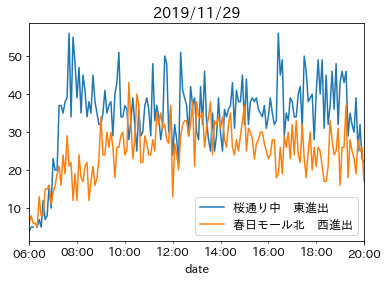

In [435]:
pd_joto['2019-11-29 06:00:00': '2019-11-29 20:00:00'].plot(title="2019/11/29") # 範囲指定して

In [447]:
pd_joto['hour'] = pd_joto.index.hour
#pd_joto.head(30)

In [443]:
pd_joto_hour = pd_joto.groupby('hour')[['桜通り中　東進出', '春日モール北　西進出']].sum()

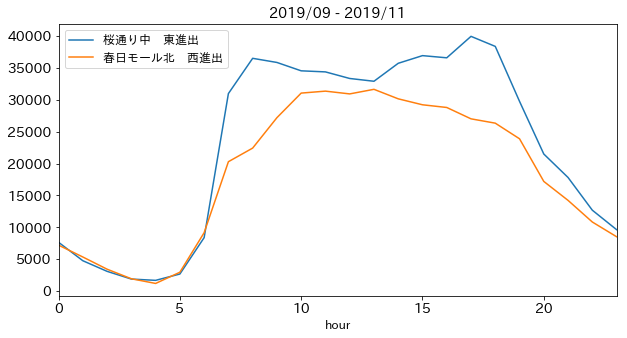

In [444]:
pd_joto_hour.plot(figsize=(10,5),fontsize=14, title="2019/09 - 2019/11")

東行きの方が恒常的に交通量が多いというデータになっている。

下記、目視データとは異なる。？？？

目視データは、「桜通り　西進入」、「桜通り　東進出」なので、桜通り南北から入った車の量分が異なる？ JARTICデータにはそのようなカテゴリはないので、厳密な比較は不可能。

## 目視での交通量調査 (12/01, 12/02, 12/03)






In [1]:
import csv
import pandas as pd
from datetime import datetime as dt

''' データの読み込み: westboundとeastboundをキーとする辞書に '''
filename = {"1130": "/home/toyoki/work/kofu/handCountData/20191130_all.csv",
            "1201": "/home/toyoki/work/kofu/handCountData/20191201_all.csv",
            "1203": "/home/toyoki/work/kofu/handCountData/20191203_all_trunc10.csv" # 10時以前のデータを削除したもの
           }

east_idx = 0
west_idx = 1
del_idx = -1 # 取り消しid (直前のを取り消す)

data = {"2019-11-30": {"westbound": [], "eastbound": []},
        "2019-12-01": {"westbound": [], "eastbound": []},
        "2019-12-03": {"westbound": [], "eastbound": []}
       }
label = {"1130": "2019-11-30", "1201": "2019-12-01", "1203": "2019-12-03"}
for d in filename:
    with open(filename[d], 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        for line in reader:
            flag = int(line[1])
            if flag == east_idx :
                data[label[d]]['eastbound'].append(dt.strptime(line[0], "%Y-%m-%d %H:%M:%S"))
                prev_direction = "eastbound"
            elif flag == west_idx:
                data[label[d]]['westbound'].append(dt.strptime(line[0], "%Y-%m-%d %H:%M:%S"))
                prev_direction = "westbound"
            elif flag == del_idx :
                data[label[d]][prev_direction].pop(-1) # 「取り消し」の処理 (一つ前を消す)

CompletedProcess(args='inkscape --file JotoVehicleData2019.svg --export-emf JotoVehicleData2019.emf', returncode=0)

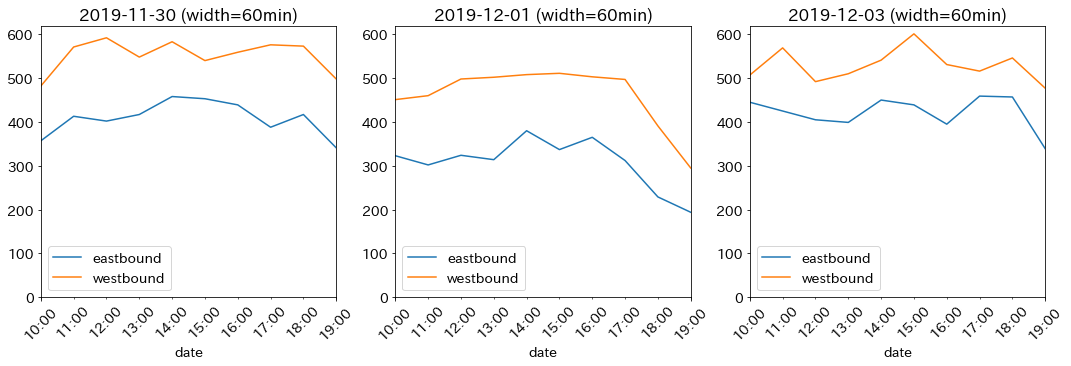

In [74]:
''' 時間幅を設定してカウント (カウントには、pandasの機能を使う) '''
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

delta_min = "60min" # 集計時間間隔

plt.rcParams["font.size"] = 14
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 5))

fig_no =0
for day in data:
    e_data = pd.DataFrame(data[day]['eastbound'], columns=['date'])
    e_data['eastbound'] = 1 # groupbyで集計するためのダミー変数
    w_data = pd.DataFrame(data[day]['westbound'], columns=['date'])
    w_data['westbound'] = 1
    
    e = e_data.groupby(pd.Grouper(key="date", freq=delta_min)).count()
    w = w_data.groupby(pd.Grouper(key="date", freq=delta_min)).count()
    traffic = pd.concat([e,w], axis=1, join='outer')
    traffic = traffic.fillna(0) # NaNを0に
    traffic.plot(title= day + " (width=" + delta_min + ")", ylim=[0,620], rot=45, ax = axes[fig_no])
    fig_no += 1
    
file_body = "JotoVehicleData2019"
plt.savefig(file_body + ".svg", bbox_inches="tight")
import subprocess
subprocess.run("inkscape --file " + file_body + ".svg" + " --export-emf " + file_body + ".emf", shell=True)

CompletedProcess(args='inkscape --file 城東・目視自動車交通量.svg --export-emf 城東・目視自動車交通量.emf', returncode=0)

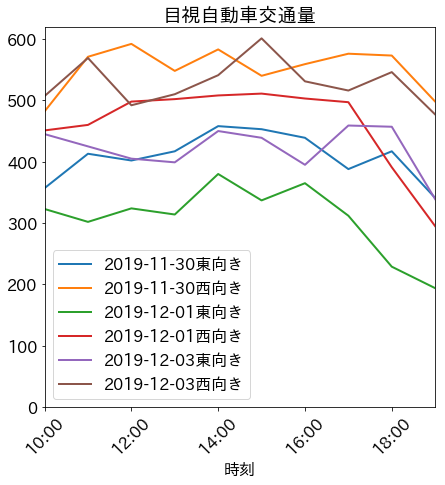

In [81]:
# 目視交通量1枚の図に

delta_min = "60min" # 集計時間間隔

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))

fig_no =0
for day in data:
    e_data = pd.DataFrame(data[day]['eastbound'], columns=['date'])
    e_data[day + '東向き'] = 1 # groupbyで集計するためのダミー変数
    w_data = pd.DataFrame(data[day]['westbound'], columns=['date'])
    w_data[day + '西向き'] = 1
    
    e = e_data.groupby(pd.Grouper(key="date", freq=delta_min)).count()
    w = w_data.groupby(pd.Grouper(key="date", freq=delta_min)).count()
    traffic = pd.concat([e,w], axis=1, join='outer')
    traffic = traffic.fillna(0) # NaNを0に
    traffic = traffic.reset_index()
    traffic['時刻'] = traffic['date'].dt.strftime("%H:%M")
    traffic.plot(x='時刻', y = day + "東向き",  ylim=[0,620], rot=45, ax = ax, lw=2)
    traffic.plot(x='時刻', y = day + "西向き",  ylim=[0,620], rot=45, ax = ax, lw=2)

#    fig_no += 1
ax.set_title("目視自動車交通量" ) 
file_body = "城東・目視自動車交通量"
plt.savefig(file_body + ".svg", bbox_inches="tight")
import subprocess
subprocess.run("inkscape --file " + file_body + ".svg" + " --export-emf " + file_body + ".emf", shell=True)

In [72]:
traffic = traffic.reset_index()
# traffic['time'] = pd.to_datetime(traffic['時刻'], "%H:%M")
#traffic[traffic['date']>= dt.strptime("2019-12-03 10:00:00", "%Y-%m-%d %H:%M:%S")]

index                date  2019-12-03東向き  2019-12-03西向き     時刻
3       3 2019-12-03 10:00:00            446            507  10:00
4       4 2019-12-03 11:00:00            425            569  11:00
5       5 2019-12-03 12:00:00            405            492  12:00
6       6 2019-12-03 13:00:00            399            510  13:00
7       7 2019-12-03 14:00:00            450            541  14:00
8       8 2019-12-03 15:00:00            439            601  15:00
9       9 2019-12-03 16:00:00            395            531  16:00
10     10 2019-12-03 17:00:00            459            516  17:00
11     11 2019-12-03 18:00:00            457            546  18:00
12     12 2019-12-03 19:00:00            339            477  19:00

In [452]:
# データの書き出し（他のデータとの統合用)
delta_min = "60min" # 集計時間間隔
data = {"1130": {"car_west": [], "car_east": []},
        "1201": {"car_west": [], "car_east": []},
        "1203": {"car_west": [], "car_east": []}
       }
for d in filename:
    with open(filename[d], 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        for line in reader:
            flag = int(line[1])
            if flag == east_idx :
                data[d]['car_east'].append(dt.strptime(line[0], "%Y-%m-%d %H:%M:%S"))
                prev_direction = "car_east"
            elif flag == west_idx:
                data[d]['car_west'].append(dt.strptime(line[0], "%Y-%m-%d %H:%M:%S"))
                prev_direction = "car_west"
            elif flag == del_idx :
                data[d][prev_direction].pop(-1) # 「取り消し」の処理 (一つ前を消す)
traffic_all = pd.DataFrame()
for day in data:
    e_data = pd.DataFrame(data[day]['car_east'], columns=['date'])
    e_data['car_east'] = 1 # groupbyで集計するためのダミー変数
    w_data = pd.DataFrame(data[day]['car_west'], columns=['date'])
    w_data['car_west'] = 1
    
    e = e_data.groupby(pd.Grouper(key="date", freq=delta_min)).count()
    w = w_data.groupby(pd.Grouper(key="date", freq=delta_min)).count()
    traffic = pd.concat([e,w], axis=1, join='outer')
    traffic.reset_index(inplace=True)
    traffic['day'] = traffic['date'] .dt.strftime("%Y%m%d")
    traffic['hour'] = traffic['date'].dt.strftime("%H")
    traffic_all = pd.concat([traffic_all, traffic])

traffic_all.drop(columns=['date'], inplace=True)
traffic_all.rename(columns={'day': 'date'},inplace=True)
#traffic_all
traffic_all.to_csv("car_traffic2019.csv", index=False)


## Google traffic info

GoobleのAPIを通じて得られる2地点間の車での所要時間を取得する。

方法（プログラム）については、

https://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/labTips/UseGoogleAPI.html

に書いてある通り。

2019/12/23より、城東通のNTT甲府支社東の交差点から甲府警察署交差点（平和通と城東通の交差点）の所要時間を記録している。

つぎのようにしてみることができる。



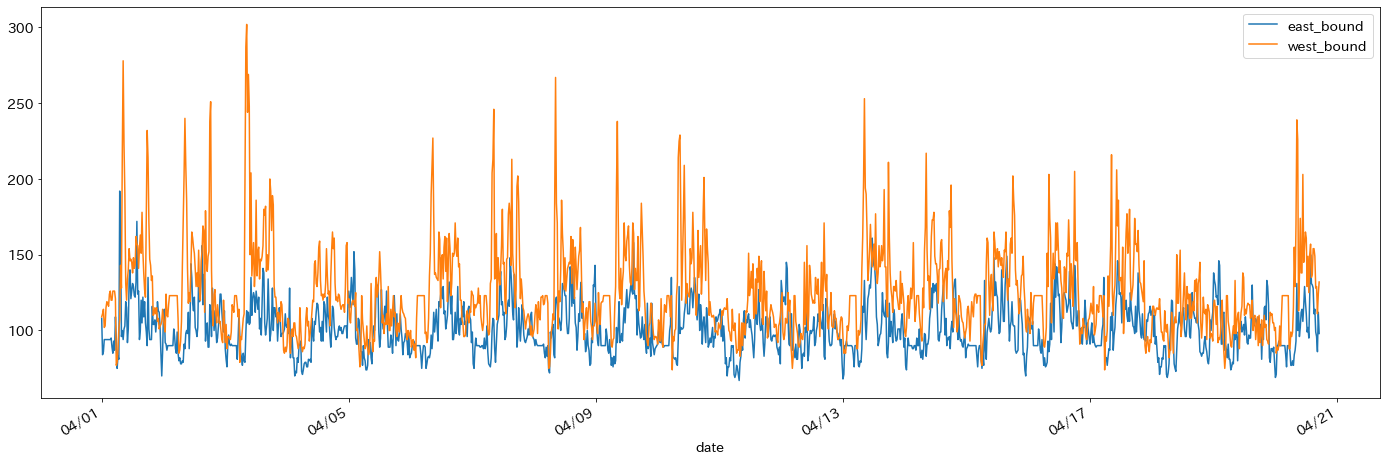

In [14]:
# 8tops上で採取しているデータの閲覧
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter # 時間軸のフォーマットを自在に
fig, ax = plt.subplots(figsize=(8, 6))

df = pd.read_csv("/ssd/toyoki/googleData/joto/jotoBothTrafficByGoogle.csv",sep=",",skipinitialspace=True)
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M:%S')

# 描画期間の限定（全部だと多すぎるので）
df4plot = df[(dt.strptime("2020-04-01","%Y-%m-%d") < df['date']) & 
            (df['date'] < dt.strptime("2020-04-21","%Y-%m-%d"))]

df4plot.plot(x='date', y=['east_bound','west_bound'], figsize=(24,8), ax=ax)
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

### 所要時間の時間変化 (日にちについての平均)

曜日別の平均はあとで行うとして、データのある日にちを折りたたんで、1日の変化をみてみる。

In [9]:
# これまでに得られた日にちについて時刻ごとに平均した値　（平日、休日を分けたほうが良いのだが）


df['date_obj'] = pd.to_datetime(df['date'])          # dateは文字列なので、datetime型の列を新設
df['hour_min'] = df['date_obj'].dt.strftime("%H:%M") # 時分の文字列の列を新設

# 描画期間の限定（全部だと多すぎるので）
df4av = df[(dt.strptime("2020-02-01","%Y-%m-%d") <= df['date']) & 
        (df['date'] <= dt.strptime("2020-03-31","%Y-%m-%d"))]

# groupbyによる平均値計算mean()を行うとマルチインデックスのデータ構造になる
# reset_index()によりマルチインデックスが解除になる
mean_df = df4av.groupby('hour_min').mean().reset_index()
# mean_df
# df.head()

CompletedProcess(args='inkscape --file JotoGoogleDirectionData.svg --export-emf JotoGoogleDirectionData.emf', returncode=0)

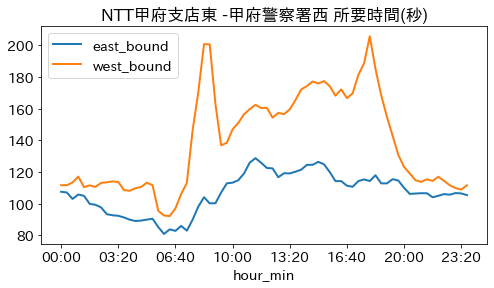

In [10]:
# 取得期間を平均した日変位データmean_dfをプロット

# 期間を限定したいときは次を使う
# df = df[(dt.strptime("2020-01-05","%Y-%m-%d") < df['date']) & 
#        (df['date'] < dt.strptime("2020-01-31","%Y-%m-%d"))]


plt.rcParams["font.size"] = 14
fig, ax = plt.subplots(figsize=(8, 4))
mean_df.plot(x='hour_min', y=['east_bound','west_bound'], ax=ax, fontsize=14, lw=2)
ax.set_title("NTT甲府支店東 -甲府警察署西 所要時間(秒)")

file_body = "JotoGoogleDirectionData"
plt.savefig(file_body + ".svg", bbox_inches="tight")
import subprocess
subprocess.run("inkscape --file " + file_body + ".svg" + " --export-emf " + file_body + ".emf", shell=True)

### 曜日ごとの所要時間の時間変化

他のデータと合わせるために、時ごとに平均する。

17時のデータは、17:00, 17:20, 17:40, 18:00 の平均とする。

In [456]:
# 曜日指定した時系列、歩行量調査と比べるために、xx:00,xx:20,xx:40, xx+1:00 の平均をxx時の所要時間とする
# 曜日は日曜から順に0,1,2,.,6
df['day_of_week'] = df['date_obj'].dt.strftime('%w').astype(int)
df['hour'] = df['date_obj'].dt.strftime('%H').astype(int)
df['min'] = df['date_obj'].dt.strftime('%M').astype(int)
mean_df = df.groupby(['hour_min', 'day_of_week']).mean().reset_index()
mean_df.head(30)

hour_min  day_of_week  distance  west_bound_std  west_bound  \
0     00:00            0     460.0          154.75      117.75   
1     00:00            1     460.0          154.00      115.60   
2     00:00            2     460.0          152.50      104.00   
3     00:00            3     460.0          152.50      107.00   
4     00:00            4     460.0          152.50       94.50   
5     00:00            5     460.0          153.25      109.25   
6     00:00            6     460.0          154.75      108.50   
7     00:20            0     460.0          154.75      119.75   
8     00:20            1     460.0          154.00      109.80   
9     00:20            2     460.0          152.50       89.50   
10    00:20            3     460.0          152.50      108.25   
11    00:20            4     460.0          152.50       99.00   
12    00:20            5     460.0          153.25      106.75   
13    00:20            6     460.0          154.75      102.75   
14    00:40            0     460.0          154.75      117.75   
15    00:40            1     460.0          154.00      110.00   
16    00:40            2     460.0          152.50       99.00   
17    00:40            3     460.0          152.50      117.25   
18    00:40            4     460.0          152.50      101.50   
19    00:40            5     460.0          153.25      111.50   
20    00:40            6     460.0          154.75      107.25   
21    01:00            0     460.0          154.75      128.50   
22    01:00            1     460.0          154.00      106.80   
23    01:00            2     460.0          152.50       97.25   
24    01:00            3     460.0          152.50      126.00   
25    01:00            4     460.0          152.50      114.25   
26    01:00            5     460.0          153.25      106.75   
27    01:00            6     460.0          154.75      110.00   
28    01:20            0     460.0          154.75      109.75   
29    01:20            1     460.0          154.00      100.80   

    east_bound_std  east_bound  hour   min  
0           116.50       99.50   0.0   0.0  
1           116.40       87.20   0.0   0.0  
2           116.25      104.75   0.0   0.0  
3           116.25      104.50   0.0   0.0  
4           116.25       91.00   0.0   0.0  
5           116.25      104.00   0.0   0.0  
6           116.50      106.00   0.0   0.0  
7           116.50      100.25   0.0  20.0  
8           116.40       87.00   0.0  20.0  
9           116.25      104.75   0.0  20.0  
10          116.25       96.25   0.0  20.0  
11          116.25      106.25   0.0  20.0  
12          116.25      104.25   0.0  20.0  
13          116.50      114.00   0.0  20.0  
14          116.50       93.75   0.0  40.0  
15          116.40       88.60   0.0  40.0  
16          116.25       97.25   0.0  40.0  
17          116.25       99.50   0.0  40.0  
18          116.25       97.75   0.0  40.0  
19          116.25       98.75   0.0  40.0  
20          116.50      115.50   0.0  40.0  
21          116.50      101.00   1.0   0.0  
22          116.40       90.20   1.0   0.0  
23          116.25       95.50   1.0   0.0  
24          116.25       94.75   1.0   0.0  
25          116.25       94.50   1.0   0.0  
26          116.25      101.00   1.0   0.0  
27          116.50      106.50   1.0   0.0  
28          116.50      106.25   1.0  20.0  
29          116.40       90.20   1.0  20.0

In [457]:
# day_of_weekでソートしておく
temp_df = mean_df.sort_values(['day_of_week','hour_min'])
temp_df.head()

hour_min  day_of_week  distance  west_bound_std  west_bound  \
0     00:00            0     460.0          154.75      117.75   
7     00:20            0     460.0          154.75      119.75   
14    00:40            0     460.0          154.75      117.75   
21    01:00            0     460.0          154.75      128.50   
28    01:20            0     460.0          154.75      109.75   

    east_bound_std  east_bound  hour   min  
0            116.5       99.50   0.0   0.0  
7            116.5      100.25   0.0  20.0  
14           116.5       93.75   0.0  40.0  
21           116.5      101.00   1.0   0.0  
28           116.5      106.25   1.0  20.0

In [458]:
# 4行ずつの移動平均
temp_df1 = temp_df.loc[:,['day_of_week','west_bound', 'east_bound','hour','min']].rolling(4, center=True).mean()
temp_df1.tail(20)

day_of_week  west_bound  east_bound   hour   min
370          6.0    174.4375    116.4375  16.75  25.0
377          6.0    177.1250    116.3750  17.25  15.0
384          6.0    172.2500    115.5625  17.50  20.0
391          6.0    173.6875    116.9375  17.75  25.0
398          6.0    165.2500    117.8750  18.25  15.0
405          6.0    162.3125    120.0625  18.50  20.0
412          6.0    160.9375    122.4375  18.75  25.0
419          6.0    154.6875    120.1875  19.25  15.0
426          6.0    147.3125    115.6250  19.50  20.0
433          6.0    139.6875    112.7500  19.75  25.0
440          6.0    132.5000    112.8750  20.25  15.0
447          6.0    129.8125    115.8125  20.50  20.0
454          6.0    129.5625    119.8125  20.75  25.0
461          6.0    127.4375    120.5625  21.25  15.0
468          6.0    126.9375    117.6250  21.50  20.0
475          6.0    125.9375    114.7500  21.75  25.0
482          6.0    121.6875    110.1875  22.25  15.0
489          6.0    120.7500    107.5000  22.50  20.0
496          6.0    117.8125    105.3750  22.75  25.0
503          NaN         NaN         NaN    NaN   NaN

In [459]:
# min=15.0が xx:00, xx:20, xx:40, xx:0 の平均なので、その行だけを抜き出す
temp_df2 = temp_df1.query('min=="15.0"')
temp_df2.dropna().reset_index(inplace=True) # NaN の行を落とす
temp_df2.reset_index(drop=True) # インデックスの振り直し

temp_df3 = temp_df2.loc[:,['day_of_week','west_bound', 'east_bound','hour']] # 必要な列だけをdeep copy!
temp_df3['new_hour'] = temp_df3['hour'].astype(int)    # hourを整数化
temp_df3['week'] = temp_df3['day_of_week'].astype(int) # 曜日を整数化
temp_df3.reset_index(drop=True,inplace=True)          # インデックスを振り直し
temp_df3.loc[temp_df3['day_of_week'] % 1 ==0.25,'new_hour']=23 # 日付が変わる23時は、移動平均したときに17.25になってしまうので直す
final_df = temp_df3.loc[:,['week','new_hour', 'west_bound','east_bound']]
final_df.rename(columns={'new_hour': 'hour'}, inplace=True)
final_df
# ファイルへ書き出し
final_df.to_csv("google_traffic_hours.csv", index=False)

In [460]:
# 特定の曜日の表示
final_df[final_df['week']==2]

week  hour  west_bound  east_bound
48     2     0     97.4375    100.5625
49     2     1     99.2500    101.3750
50     2     2    111.6875     98.8750
51     2     3     98.3750     89.5625
52     2     4     97.6250     87.6250
53     2     5    104.0000     77.7500
54     2     6    104.8750     84.6250
55     2     7    144.6875     92.5000
56     2     8    202.3750    101.4375
57     2     9    153.3750    105.0625
58     2    10    166.3125    118.6875
59     2    11    163.1250    122.1875
60     2    12    155.7500    128.1875
61     2    13    155.1250    122.5000
62     2    14    191.0625    128.6250
63     2    15    189.0625    112.8125
64     2    16    193.1875    109.7500
65     2    17    219.4375    109.1250
66     2    18    187.8750    111.3125
67     2    19    141.0625    119.1250
68     2    20    121.5625    114.3125
69     2    21    115.8125    119.6250
70     2    22    105.0000    117.5625
71     2    23    106.5000    105.4375

## データの統合

歩行量調査、Wi-Fiデータ、自動車交通量データ、Google所要時間のまとめ

### 該当Wi-Fiデータ(20191129 - 20191201)をデータベースから抽出、ファイルへ

In [461]:
# Wi-FiのDBから時間ごとの２地点間流動数を返す
# DB接続
import sqlite3
import pandas as pd

# 8tops上でのファイル (ファイル名は環境に応じて変更すること)
conn = sqlite3.connect("/home/raspimngr/db/kofu_traveler.sqlite3")
#conn = sqlite3.connect("kofu_traveler.sqlite3")
cur = conn.cursor()

# テーブル名 (flow, flow_trunc10, flow_all_trunc, flow_all, flow_all_trunc10のどれか)
table_name = "flow_trunc10"


# 時間帯別流動数

def get_hourly_flow_days(path, start_day, end_day):
    """
    path = {"west_bound": ["3", "17"], "east_bound": ["17", "3"]} のようにdictionaryで
    kofu3: 風月堂, kofu17: ダン
    日付は "2019-11-11"の形式
    """
    count_data = {"00": {}, "01":{},"02": {},"03": {},"04": {},"05": {},"06": {},"07": {},"08": {},"09": {},
                 "10": {},"11": {},"12": {},"13": {},"14": {},"15": {},"16": {},"17": {},"18": {},"19": {},
                 "20": {},"21": {},"22": {},"23": {}}
    opt_direction = ""
    for l, pos in path.items():
        sql = ("select hour, sum(number) from " + table_name 
               + ' where origin="' + pos[0] + '" and destination="' + pos[1] + '"'
               + ' and yearday>="' + start_day + '" and yearday<="' + end_day + '" '
               + ' group by hour order by hour')
        result = cur.execute(sql).fetchall()
        for v in result:
            count_data[v[0]][l] = v[1]
    df = pd.DataFrame.from_dict(count_data)
    df = df.T
    df.fillna(0, inplace=True)
    df = df.reset_index()
    return df

In [462]:
# Wi-Fiデータ
paths = {"west_bound": ["3", "17"], "east_bound": ["17", "3"]}
wifi_df1129 = get_hourly_flow_days(paths, "2019-11-29", "2019-11-29").rename(
    columns={"index": "hour", "east_bound": "wifi_east", "west_bound": "wifi_west"})
wifi_df1130 = get_hourly_flow_days(paths, "2019-11-30", "2019-11-30").rename(
    columns={"index": "hour", "east_bound": "wifi_east", "west_bound": "wifi_west"})
wifi_df1201 = get_hourly_flow_days(paths, "2019-12-01", "2019-12-01").rename(
    columns={"index": "hour", "east_bound": "wifi_east", "west_bound": "wifi_west"})
wifi_df1129['date'] = "20191129"
wifi_df1130['date'] = "20191130"
wifi_df1201['date'] = "20191201"
wifi_df = pd.concat([wifi_df1129, wifi_df1130, wifi_df1201])
wifi_df.to_csv('joto_wifi20191129-20191201.csv', index=False)

### 各種データをファイルから読み込み統合

1. 歩行量調査データ
1. Wi-Fi流動(travelorデータ)
1. Google traffic 所要時間データ
1. 自動車交通量（目視）データ

結果が、下のtotal_dfというデータフレーム

In [463]:
# 1. ダン、風月堂の歩行量調査データを読み込み
pedes_df = pd.read_csv("pedestrianData2019.csv")
#pedes_df.head()
# east, westを横並びに
pedes_east = pedes_df[pedes_df['direction']=='E'].drop('direction', axis=1)
pedes_west = pedes_df[pedes_df['direction']=='W'].drop('direction', axis=1)
pedes_df = pd.merge(pedes_east, pedes_west, on=['date','hour'])
pedes_df.rename(columns={'fugetsu_x': 'fugetsu_east', 'fugetsu_y': 'fugetsu_west',
                        'muto_x': 'muto_east', 'muto_y': 'muto_west',
                        'total_x': 'pedes_total_east', 'total_y': 'pedes_total_west'}, inplace=True)
pedes_df.head()

date  hour  fugetsu_east  muto_east  pedes_total_east  fugetsu_west  \
0  20191129    10          18.0       54.0              72.0          43.0   
1  20191129    11          29.0       74.0             103.0          57.0   
2  20191129    12          58.0      122.0             180.0          47.0   
3  20191129    13          34.0       97.0             131.0          46.0   
4  20191129    14          22.0       82.0             104.0          61.0   

   muto_west  pedes_total_west  
0       73.0             116.0  
1       73.0             130.0  
2       71.0             118.0  
3       75.0             121.0  
4       51.0             112.0

In [464]:
# 2. WiFiデータの読み込み
wifi_df = pd.read_csv('joto_wifi20191129-20191201.csv')
wifi_df.head()


hour  wifi_east  wifi_west      date
0     0        5.0        5.0  20191129
1     1        1.0        4.0  20191129
2     2        6.0        4.0  20191129
3     3        0.0        2.0  20191129
4     4        1.0        0.0  20191129

In [465]:
# 3. Google traffic dataの読み込み
# 曜日ごとの平均データなので、各日にちの曜日のデータとする
temp_df = pd.read_csv("google_traffic_hours.csv")
g_df1129 = temp_df[temp_df['week']==5].reset_index()
g_df1129['date'] = 20191129
g_df1130 = temp_df[temp_df['week']==6].reset_index()
g_df1130['date'] = 20191130
g_df1201 = temp_df[temp_df['week']==0].reset_index()
g_df1201['date'] = 20191201
google_df = pd.concat([g_df1129, g_df1130, g_df1201]).reset_index()
google_df.head()

level_0  index  week  hour  west_bound  east_bound      date
0        0    120     5     0    108.5625    102.0000  20191129
1        1    121     5     1    114.7500     94.8125  20191129
2        2    122     5     2    119.3750     89.7500  20191129
3        3    123     5     3    126.0625     90.2500  20191129
4        4    124     5     4    103.2500     91.5000  20191129

In [466]:
# Google trafficデータを統合用データとしてセーブ
google_df.drop(columns={'level_0', 'index', 'week'}, inplace=True)
google_df.rename(columns={'west_bound': 'google_west_time', 'east_bound':'google_east_time'})
# google_df.to_csv("google_traffic2019.csv", index=False)
#google_df.dtypes

hour  google_west_time  google_east_time      date
0      0          108.5625          102.0000  20191129
1      1          114.7500           94.8125  20191129
2      2          119.3750           89.7500  20191129
3      3          126.0625           90.2500  20191129
4      4          103.2500           91.5000  20191129
5      5           90.5625           85.8750  20191129
6      6          103.6875           78.4375  20191129
7      7          149.6250           91.7500  20191129
8      8          222.0625          103.5625  20191129
9      9          167.0000          114.0000  20191129
10    10          151.6875          123.1875  20191129
11    11          179.6250          135.5625  20191129
12    12          172.5000          121.5000  20191129
13    13          178.6250          121.1250  20191129
14    14          198.5625          127.8750  20191129
15    15          207.0625          130.3750  20191129
16    16          206.6875          110.2500  20191129
17    17          229.5000          109.3750  20191129
18    18          219.0000          117.1875  20191129
19    19          172.6875          126.9375  20191129
20    20          129.1250          121.6875  20191129
21    21          125.3125          114.2500  20191129
22    22          113.0625          105.0625  20191129
23    23          101.9375          107.0625  20191129
24     0          107.1250          110.5000  20191130
25     1          113.0000          111.0000  20191130
26     2          113.8750           97.1250  20191130
27     3          106.6875           87.3125  20191130
28     4           95.8125           89.8125  20191130
29     5          110.5625           78.7500  20191130
..   ...               ...               ...       ...
41    17          177.1250          116.3750  20191130
42    18          165.2500          117.8750  20191130
43    19          154.6875          120.1875  20191130
44    20          132.5000          112.8750  20191130
45    21          127.4375          120.5625  20191130
46    22          121.6875          110.1875  20191130
47     0          120.9375           98.6250  20191201
48     1          114.3125          107.6250  20191201
49     2          110.7500          110.9375  20191201
50     3          101.0625          102.6250  20191201
51     4           92.6250          104.0625  20191201
52     5           84.6250           95.9375  20191201
53     6           91.4375           92.0625  20191201
54     7           94.5625           90.8750  20191201
55     8           91.2500           84.0625  20191201
56     9          105.2500           97.9375  20191201
57    10          120.4375          103.8125  20191201
58    11          136.5000          108.8750  20191201
59    12          144.2500          109.0625  20191201
60    13          150.8125          113.2500  20191201
61    14          151.4375          119.2500  20191201
62    15          146.5625          123.7500  20191201
63    16          146.2500          106.4375  20191201
64    17          144.3750          113.8750  20191201
65    18          124.4000          106.8875  20191201
66    19          116.9500          106.6000  20191201
67    20          113.3500          108.0500  20191201
68    21          110.6500           99.8000  20191201
69    22          100.8500           97.9500  20191201
70    23          103.3000           91.9000  20191201

[71 rows x 4 columns]

In [467]:
# 4. 目視自動車交通量

car_traffic_df = pd.read_csv("car_traffic2019.csv")
car_traffic_df.head()


car_east  car_west      date  hour
0     357.0       482  20191130    10
1     413.0       571  20191130    11
2     402.0       592  20191130    12
3     417.0       548  20191130    13
4     458.0       583  20191130    14

In [468]:
# 1203 を 1129に強制変更
car_traffic_df.loc[car_traffic_df['date'] == 20191203,'date']=20191129
car_traffic_df.head()

car_east  car_west      date  hour
0     357.0       482  20191130    10
1     413.0       571  20191130    11
2     402.0       592  20191130    12
3     417.0       548  20191130    13
4     458.0       583  20191130    14

In [418]:
# 統合
total_df = pd.merge(pedes_df, wifi_df, on = ['date','hour'])         # 歩行量とWi-Fiの結合
total_df = pd.merge(total_df, car_traffic_df, on = ['date', 'hour']) # 目視交通量の追加
total_df = pd.merge(total_df, google_df, on = ['date', 'hour'])      # google所要時間データの追加
total_df.reset_index(inplace=True)
total_df.drop(columns=['index'], inplace=True)

In [419]:
total_df

date  hour  fugetsu_east  muto_east  pedes_total_east  fugetsu_west  \
0   20191129    10          18.0       54.0              72.0          43.0   
1   20191129    11          29.0       74.0             103.0          57.0   
2   20191129    12          58.0      122.0             180.0          47.0   
3   20191129    13          34.0       97.0             131.0          46.0   
4   20191129    14          22.0       82.0             104.0          61.0   
5   20191129    15          38.0      104.0             142.0          39.0   
6   20191129    16          55.0      110.0             165.0          59.0   
7   20191129    17          81.0      191.0             272.0          66.0   
8   20191129    18          76.0      171.0             247.0         132.0   
9   20191129    19          75.0      138.0             213.0         117.0   
10  20191130    10          24.0       39.0              63.0          53.0   
11  20191130    11          20.0       86.0             106.0          37.0   
12  20191130    12          42.0       84.0             126.0          51.0   
13  20191130    13          36.0       63.0              99.0          45.0   
14  20191130    14          37.0       85.0             122.0          68.0   
15  20191130    15          51.0      104.0             155.0          53.0   
16  20191130    16          56.0       97.0             153.0          52.0   
17  20191130    17          52.0      117.0             169.0         111.0   
18  20191130    18          74.0      118.0             192.0         160.0   
19  20191130    19          61.0      126.0             187.0         109.0   
20  20191201    10          20.0       47.0              67.0          44.0   
21  20191201    11          23.0       62.0              85.0          36.0   
22  20191201    12          21.0       90.0             111.0          69.0   
23  20191201    13          37.0       71.0             108.0          50.0   
24  20191201    14          25.0       68.0              93.0          43.0   
25  20191201    15          34.0       89.0             123.0          44.0   
26  20191201    16          44.0       90.0             134.0          49.0   
27  20191201    17          44.0       92.0             136.0          45.0   
28  20191201    18          37.0       83.0             120.0          40.0   
29  20191201    19          29.0      111.0             140.0          71.0   

    muto_west  pedes_total_west  wifi_east  wifi_west  car_east  car_west  \
0        73.0             116.0       38.0       32.0     446.0       507   
1        73.0             130.0       27.0       44.0     425.0       569   
2        71.0             118.0       20.0       34.0     405.0       492   
3        75.0             121.0       22.0       41.0     399.0       510   
4        51.0             112.0       23.0       38.0     450.0       541   
5        52.0              91.0       34.0       37.0     439.0       601   
6        57.0             116.0       22.0       41.0     395.0       531   
7        88.0             154.0       34.0       47.0     459.0       516   
8        70.0             202.0       58.0       61.0     457.0       546   
9        50.0             167.0       33.0       54.0     339.0       477   
10       62.0             115.0       16.0       43.0     357.0       482   
11       61.0              98.0       25.0       42.0     413.0       571   
12       87.0             138.0       21.0       46.0     402.0       592   
13       70.0             115.0       19.0       47.0     417.0       548   
14       76.0             144.0       19.0       37.0     458.0       583   
15       65.0             118.0       21.0       28.0     453.0       540   
16       73.0             125.0       27.0       40.0     439.0       559   
17       91.0             202.0       30.0       58.0     388.0       576   
18       96.0             256.0       27.0       54.0     417.0       573   
19       59.0     

列名の意味

- fugetsu_*, muto_* : 歩行量調査データ
- pedes_total_* : 歩行量調査のfugetsu, mutoの合計
- wifi_* : Wi-Fiデータからみた検知アドレス数（ダン、風月堂の）
- car_* : 目視での車交通量のカウント数（われわれの実測）
- *_bound: Google trafficでの所要時間(sec)データ


In [420]:
total_df.to_csv("joto_data_summary.csv")